In [66]:
sample = "/Users/troydo42/Downloads/1401_Lottee/"

In [15]:
import os

def getFramesPath(sample_dir):
    frames = sorted(os.listdir(sample_dir+"frames"))
    total_frames = len(frames)
    frames_path = ["" for x in range(total_frames)]
    # print(len(frames_path))
    for frame in frames:
        root_ext = os.path.splitext(frame)
        if root_ext[1] == '.png':
            frame_index = int(root_ext[0][0:2])
            frames_path[frame_index] = os.path.join(sample_dir + "/frames/"+frame)
        
    return frames_path

In [16]:
frame_paths = getFramesPath(sample)
frame_paths

['/Users/troydo42/Downloads/1401_Lottee//frames/00_1460_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/01_1460_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/02_1430_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/03_1464_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/04_1403_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/05_1542_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/06_1383_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/07_1381_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/08_1371_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/09_1265_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/10_1427_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/11_1332_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/12_1345_4951~2.png',
 '/Users/troydo42/Downloads/1401_Lottee//frames/13_1367_4951~2.png',
 '/Users/troydo42/Downloads/1401_L

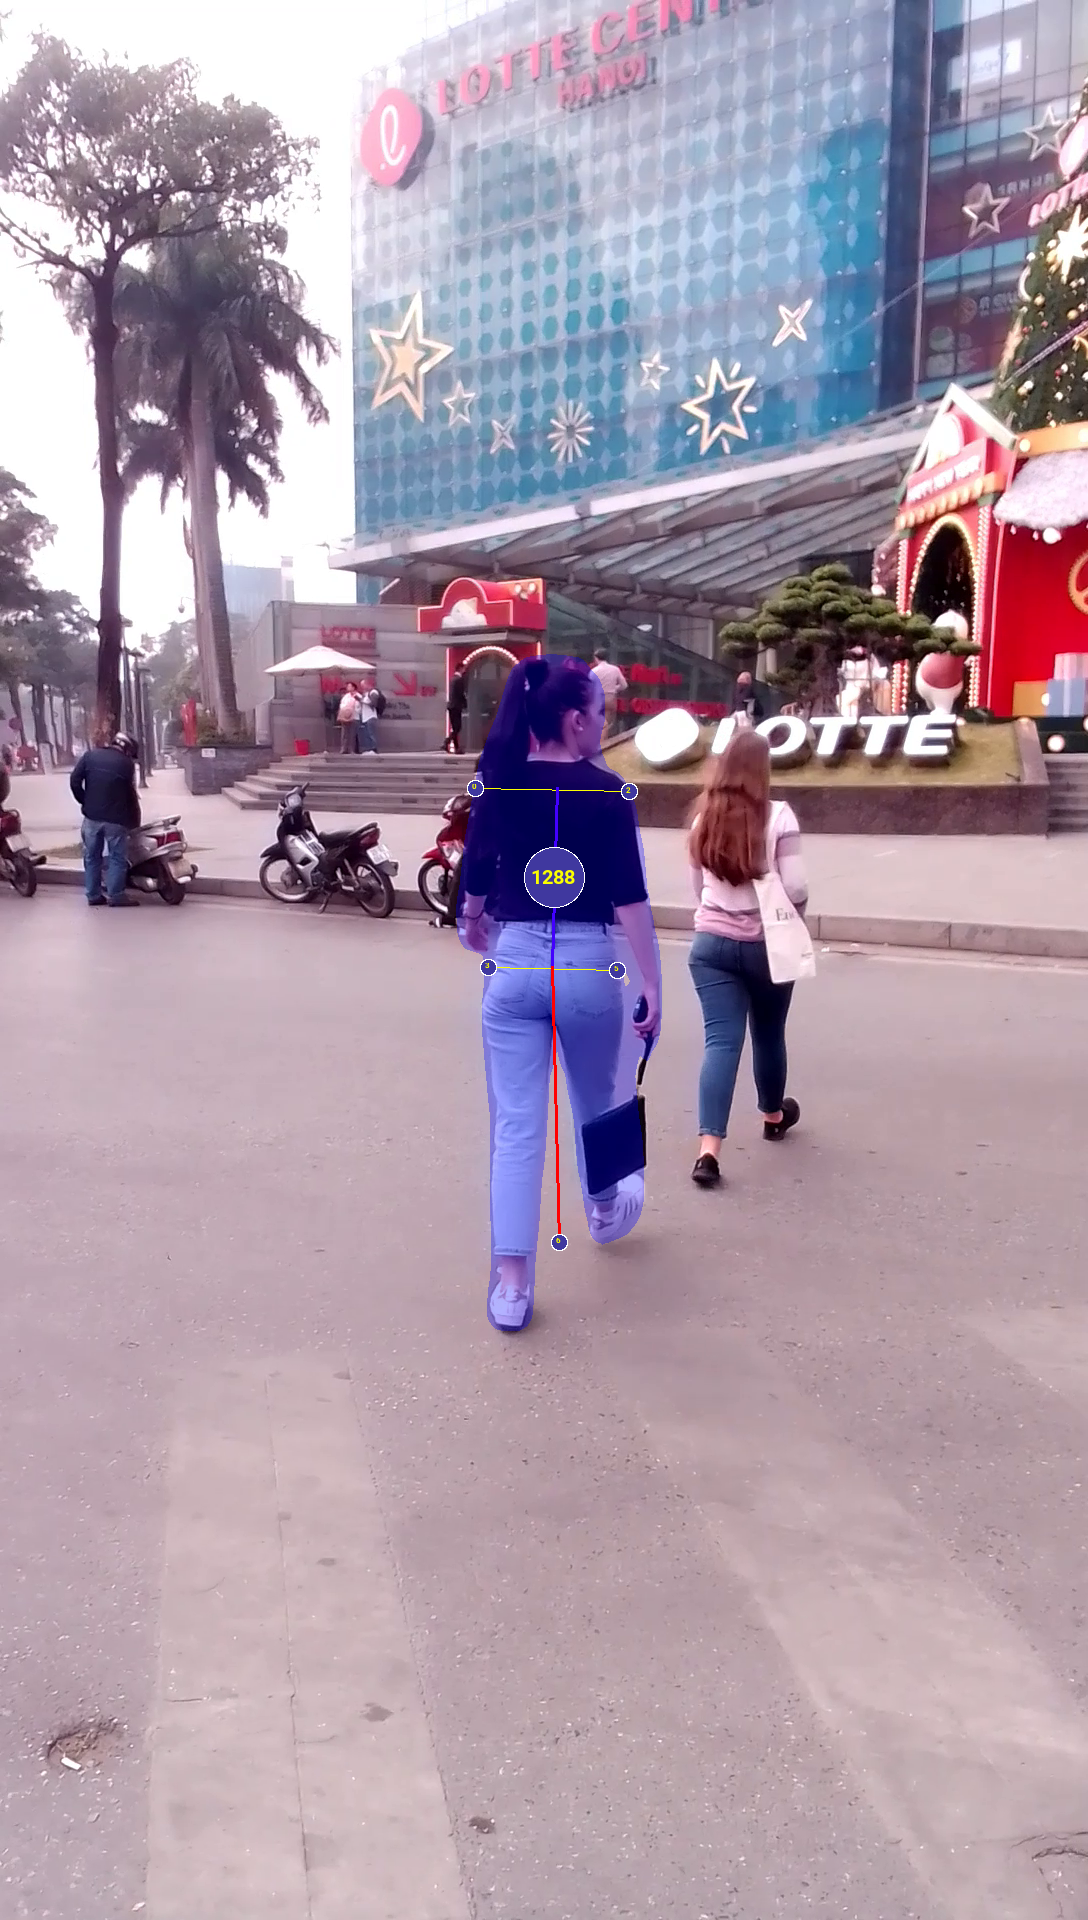

In [18]:
from PIL import Image
image = Image.open(frame_paths[21])
image

In [63]:
import av

def generate_instagram_vid(vid_name, vid_width, vid_height, frames_path, stop_index, fps, repeat_rate,slow_motion_rate):
    container = av.open(vid_name, mode="w")

    ### Add mp4 stream to container with fps, width and height
    stream = container.add_stream("mpeg4", rate=int(fps))
    stream.width = vid_width
    stream.height = vid_height
    
    ### Write Encode function to Encode frame into Mpeg4 format
    def encode(image):
        frame = av.VideoFrame.from_image(image)
        for packet in stream.encode(frame):
            container.mux(packet)
            
    def slow_motion_reverse(frames_path):
        frames_count = len(frame_paths)
        total_frames = frames_count * 2 * repeat_rate
        print("Total Frames is ", total_frames)
        
        for idx in range(total_frames):
            local_index = idx%len(frame_paths)
            play_times = int(idx/len(frame_paths))
        
            if play_times % 2 == 0 and play_times < (repeat_rate * 2 - 1):
                frame_index = local_index
                print(frame_index, play_times)
                frame = Image.open(frame_paths[local_index])
                frames = [frame] * slow_motion_rate
                for frame in frames:
                    encode(frame)
                    
            elif play_times == (repeat_rate * 2 - 1):
                frame_index = frames_count - local_index - 1
                if frame_index > stop_index:
                    print(frame_index, play_times)
                    frame = Image.open(frame_paths[frame_index])
                    frames = [frame] * slow_motion_rate * 3
                    for frame in frames:
                        encode(frame)
                elif frame_index == stop_index:
                    print(frame_index, play_times)
                    frame = Image.open(frame_paths[frame_index])
                    frames = [frame] * slow_motion_rate * 90
                    for frame in frames:
                        encode(frame)
                                
            else:
                print(frame_index, play_times)
                frame = Image.open(frame_paths[frames_count - local_index - 1])
                frames = [frame] * slow_motion_rate
                for frame in frames:
                    encode(frame)
            
    slow_motion_reverse(frames_path)
    ### Close Container
    container.close()

In [65]:
### Find Most Accurate Scores
import numpy as np
import seaborn as sns

def best_scores(array, min_val):
    scores = []
    for x in array:
        if x < min_val:
            pass
        else:
            scores.append(x)
            
    np_scores = np.array(scores)
    mean = np.mean(np_scores)
    median = np.median(np_scores)
    minim = np.min(np_scores)
    maxim = np.max(np_scores)
    histogram_scores = np.histogram(np_scores)
    print(mean, median)
    sns.distplot(np_scores, hist=True)  
    return mean, median, minim, maxim


def find_nearest(array, value):
    np_scores = np.array(array)
    distance_array = np.abs(np_scores - value)
    idx = distance_array.argmin()
    return array[idx], idx


def find_best_frame(sample):
    sample_scores_data = sample + "scores.npy"
    sample_scores = np.load(sample_scores_data)
    mean, median, minim, maxim = best_scores(sample_scores, 1000)
    score, index = find_nearest(sample_scores.tolist(), mean)
    print(score, index,"/",len(sample_scores),"\n",sample_scores )
    return score, index

1450.65 1444.0
1450 15 / 60 
 [1460 1430 1464 1403 1542 1383 1381 1371 1265 1427 1332 1345 1367 1464
 1393 1450 1279 1441 1440 1453 1394 1288 1248 1375 1455 1565 1362 1356
 1428 1447 1524 1638 1543 1615 1578 1569 1497 1388 1271 1342 1431 1477
 1494 1391 1461 1518 1587 1624 1597 1602 1544 1609 1539 1484 1429 1381
 1399 1424 1511 1564]


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


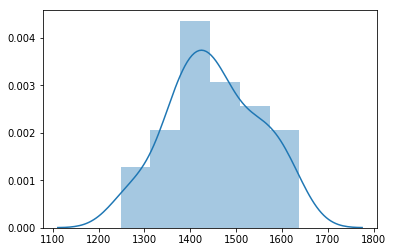

In [67]:
score, index = find_best_frame(sample)

In [68]:
generate_instagram_vid(
    "instagram_vid_2x1x90.mp4",
    image.width, 
    image.height, 
    frame_paths, 
    index, 30, 2, 1
)

Total Frames is  240
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
59 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 2
58 2
59 2
59 3
58 3
57 3
56 3
55 3
54 3
53 3
52 3
51 3
50 3
49 3
48 3
47 3
46 3
45 3
44 3
43 3
42 3
41 3
40 3